In [446]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import random 

In [447]:
df = pd.read_csv("traffic.csv")

In [448]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [449]:
df.iloc[:, 0]

0        2015-11-01 00:00:00
1        2015-11-01 01:00:00
2        2015-11-01 02:00:00
3        2015-11-01 03:00:00
4        2015-11-01 04:00:00
                ...         
48115    2017-06-30 19:00:00
48116    2017-06-30 20:00:00
48117    2017-06-30 21:00:00
48118    2017-06-30 22:00:00
48119    2017-06-30 23:00:00
Name: DateTime, Length: 48120, dtype: object

In [450]:
amnt = 21024

In [451]:
start = datetime.datetime(2022, 6, 1, 0, 0, 0)
add = datetime.timedelta(minutes=5)
date = []
for i in range(amnt):
    date.append(start)
    start += add


In [452]:
print(start)

2022-08-13 00:00:00


In [453]:
print(len(date))

21024


In [454]:
before = random.uniform(0.8, 1.6)
day = random.uniform(1.3, 2.3)
peak = random.uniform(2.6, 3.6)
noon = random.uniform(1.8, 2.9)
late = random.uniform(2.8, 4.0)
down = random.uniform(1.9, 2.6)
night = random.uniform(1.1, 2.3)

random.seed(1234)

car = []

for i in range(len(date)):
    time = date[i].hour
    num = df["Vehicles"][i]
    if 0 <= time < 6:
        car.append(num * before)
    if 6 <= time < 8:
        car.append(num * day)
    if 8 <= time < 9:
        car.append(num * peak)
    if 9 <= time < 13:
        car.append(num * noon)
    if 13 <= time < 18:
        car.append(num * late)
    if 18 <= time < 21:
        car.append(num * down)
    else:
        car.append(num * night)

    if len(car) >= amnt:
        break


In [455]:
len(car)

21024

In [456]:
num = [int(e / 10) for e in car]

In [457]:
len(num)

21024

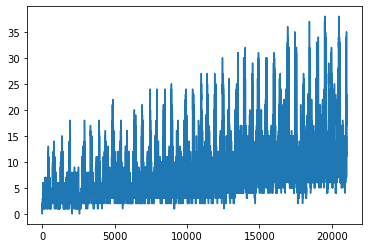

In [458]:
plt.plot(num)
plt.show()

In [459]:
out = pd.DataFrame()
out["date"] = date
out["cars"] = num

In [460]:
out.to_csv("trafficJam.csv", index=False)

In [461]:
%%capture
! wget "https://github.com/HEKYPTO/TrafficJam/blob/main/trafficJam.csv?raw=true"

In [462]:
df = pd.read_csv("trafficJam.csv?raw=true")

In [463]:
df

,date,cars
0,2022-06-01 00:00:00,2
1,2022-06-01 00:05:00,2
2,2022-06-01 00:10:00,2
3,2022-06-01 00:15:00,2
4,2022-06-01 00:20:00,1
...,...,...
25147,2022-08-27 07:35:00,25
25148,2022-08-27 07:40:00,24
25149,2022-08-27 07:45:00,24
25150,2022-08-27 07:50:00,23
